# Random Forest Classifier

Random Forest:
- set of multiple dt's
  
Aggregation Step:
- if we have numerical values we use the mean of the values for the predicted value 
- if we have classifiers then we use their mode of the values for the predicted values

Random Forest = (Bootstrapping + Aggregation)-> Bagging

Bootstrapping:
- making unique dt's from training sample
- we have to make every decision tree unique in random forest model
- less sensitive to training data

Ideal size of feature subset:
- either take square root of no of features or log of total no of features

- Deep decision trees may suffer from overfitting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1:]

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X,y)
model.predict([[10, 4, 3, 6]])

C:\Users\stech\AppData\Local\Temp\ipykernel_21328\627293097.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)
c:\Users\stech\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['virginica'], dtype=object)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

predictions = model.predict(x_test)
predictions

array(['setosa', 'virginica', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'setosa', 'virginica', 'setosa', 'virginica', 'virginica',
       'virginica', 'setosa', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'setosa', 'virginica'], dtype=object)

In [19]:
score = model.score(x_test, y_test)
print('The accuracy score is: ',score)

The accuracy score is:  1.0


In [20]:
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y_test, predictions))

Accuracy:  1.0


In [21]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[14,  0,  0],
       [ 0,  6,  0],
       [ 0,  0, 10]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 1.0')

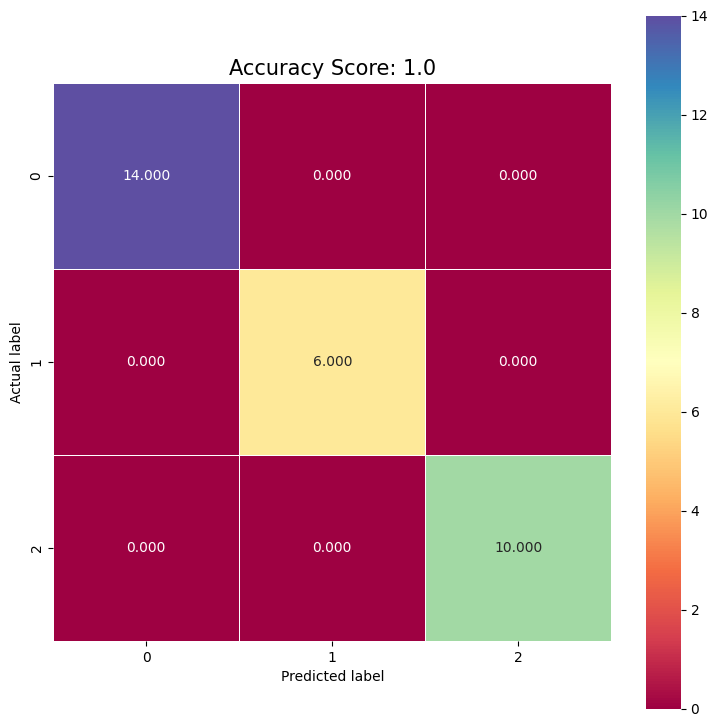

In [23]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Spectral')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [28]:
df2 = pd.read_csv('mldata.csv')
df2.head()

,age,height,weight,likeness,gender
0,27,170.688,76.0,Biryani,Male
1,41,165.000,70.0,Biryani,Male
2,29,171.000,80.0,Biryani,Male
3,27,173.000,102.0,Biryani,Male
4,29,164.000,67.0,Biryani,Male


In [ ]:
df2 = df2.drop(columns=['likeness', 'gender'])

In [32]:
df2.head()

,age,height,weight
0,27,170.688,76.0
1,41,165.000,70.0
2,29,171.000,80.0
3,27,173.000,102.0
4,29,164.000,67.0


In [33]:
X = df2.iloc[: , :-1]
y = df2.iloc[: , -1:]

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 7, random_state = 18)
rf.fit(X, y)
# rf.predict([[27, 160]])

C:\Users\stech\AppData\Local\Temp\ipykernel_21328\2861787389.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, y)


RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=300,
                      random_state=18)

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Predict on test data
prediction = rf.predict(x_test)
# Compute mean squared error
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
# Print results
print(mse)
print(rmse)

82.80091405734363
9.09950075868691
